# Gradient descent

In dit notebook staan een aantal opgaven die als doel hebben de werking van *gradient descent* te leren begrijpen. Het gradient descent algoritme heeft als doel het stapsgewijs vinden van een / de minimumwaarde van een functie. We zullen het algoritme handmatig toepassen en het algoritme implementeren in Python.

In [90]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

# Plots inline
%matplotlib inline

print("Matplotlib version", matplotlib.__version__)

Matplotlib version 3.8.0


In [91]:
import warnings
# warnings.filterwarnings('ignore')

## Deel I. Simpele kwadratische functie

Gegeven de functie:

$$ f_1(x) = {x^2} $$

Voor deze functie is het eenvoudig om de minimumwaarde te vinden: $x=0$ geeft het minimum $f_1(x) = 0$. Er zijn verschillende manieren om dat minimum te vinden.

### Plotten
In onderstaande plot kun je in één oogopslag het minimum zien.

In [92]:
# Functie voor f1(x)
def f1(x):
    return x**2

In [93]:
# Input en output f1(x) bepalen
x = np.linspace(-5,5,1000) 
y = f1(x)

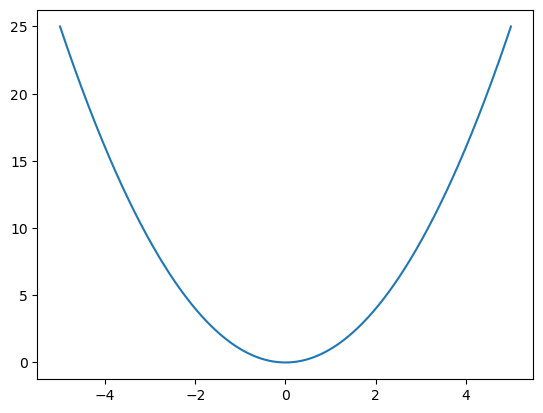

In [94]:
# Input en output f1(x) plotten
plt.plot(x,y)
plt.show()

### Afgeleide bepalen

In een grafiek kun je niet altijd precies de waardes aflezen. Je kunt in dat geval de afgeleide gebruiken: daar waar de afgeleide 0 is, is er sprake van een _maximum_ (of 'piek') of een _minimum_ (een 'dal'). Dit hoeft niet het _globale_ maximum of minimum te zijn, maar kan ook een _lokaal_ maximum of minimum zijn. Als er sprake is van een functie in meerdere dimensies, kan een afgeleide van 0 ook betekenen dat je op een _zadelpunt_ zit (het maximum van de ene variabele en het minimum van de andere variabele).

De afgeleide van $f_1(x)$ is simpel te bepalen:

$$ f_1'(x) = {2x} $$

Door vervolgens de vergelijking $f_1'(x) = 0$ op te lossen, vind je het (in dit geval) minimum:

\begin{align}
    f_1'(x) &= 0  \\
    2x &= 0       \\
    x &= 0
\end{align}

### Gradient descent

Helaas is het leven niet altijd zo eenvoudig. Functies met meer dan drie variabelen kun je niet plotten en berekenen waar de afgeleide van een functie 0 is, is vaak niet haalbaar. Gelukkig hebben we het gradient descent algoritme. 

### Oefening 6.1a

Pas het gradient descent algoritme **handmatig** toe om het minimum van $f_1(x)$ te vinden voor een viertal scenario's:

1. Startpunt $x = 1$ en learning rate $\eta = 1.0$
2. Startpunt $x = 1$ en learning rate $\eta = 1.1$
3. Startpunt $x = 1$ en learning rate $\eta = 0.9$
4. Startpunt $x = 1$ en learning rate $\eta = 0.1$

Ga als volgt te werk:
- Bepaal de afgeleide $f'_1(x)$ van de functie $f_1(x)$
- Bepaal de gradient bij $x = 1$
- Bepaal met behulp van het startpunt, de gradient en de learning rate het vervolgpunt
- Ga door tot dat de gradient kleiner dan 0.1 is of totdat je 5 iteraties hebt doorlopen
- Plot het startpunt en de gevonden vervolgpunten op de grafiek van $f_1(x)$ om te visualiseren wat er gebeurt

In [95]:
def afgeleide(x):
    return (2*x)

def functie(x):
    return (x ** 2)

def gradient_decent(functie, afgeleide, x_start, learning_rate, max_iteraties):
    x = x_start
    y = functie(x)
    g = afgeleide(x)

    x_cors = [x]
    y_cors = [y]
    gradients = [g]

    count = 0

    while True:
        count += 1 
        x = x - learning_rate * g
        y = functie(x)
        g = afgeleide(x)

        x_cors.append(x)
        y_cors.append(y)
        gradients.append(g)
        if y < 0.1 or count == max_iteraties:
            break

    plt.plot(x_cors, y_cors)
    plt.show()
    
    print(x_cors)
    print(y_cors)
    print(gradients)

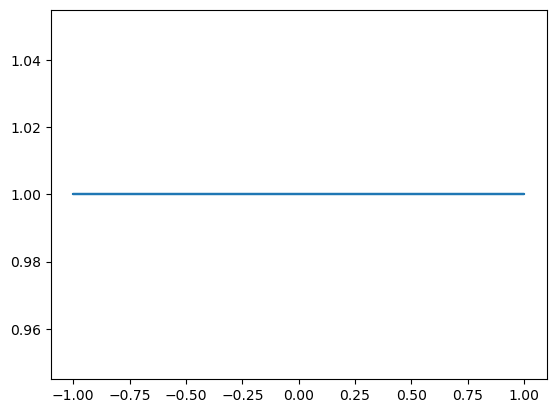

[1, -1, 1, -1, 1, -1]
[1, 1, 1, 1, 1, 1]
[2, -2, 2, -2, 2, -2]


In [96]:
gradient_decent(functie, afgeleide, 1, 1, 5)

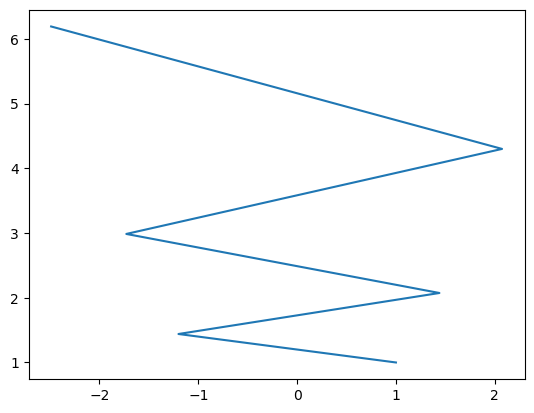

[1, -1.2000000000000002, 1.4400000000000004, -1.7280000000000006, 2.073600000000001, -2.488320000000002]
[1, 1.4400000000000004, 2.073600000000001, 2.9859840000000024, 4.299816960000005, 6.191736422400011]
[2, -2.4000000000000004, 2.880000000000001, -3.4560000000000013, 4.147200000000002, -4.976640000000004]


In [97]:
gradient_decent(functie, afgeleide, 1, 1.1, 5)

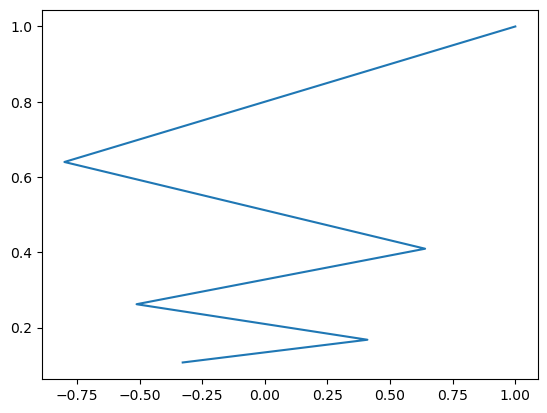

[1, -0.8, 0.6400000000000001, -0.5120000000000002, 0.4096000000000002, -0.3276800000000002]
[1, 0.6400000000000001, 0.4096000000000002, 0.26214400000000027, 0.16777216000000014, 0.10737418240000013]
[2, -1.6, 1.2800000000000002, -1.0240000000000005, 0.8192000000000004, -0.6553600000000004]


In [98]:
gradient_decent(functie, afgeleide, 1, 0.9, 5)

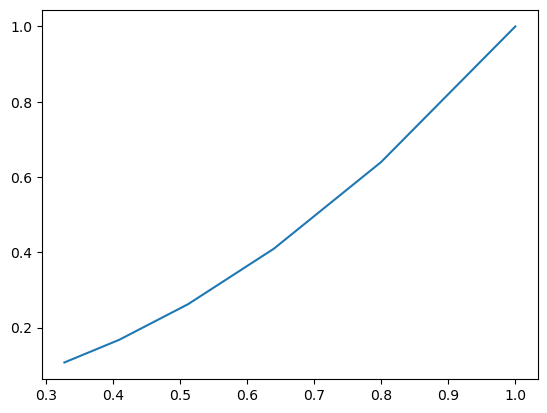

[1, 0.8, 0.64, 0.512, 0.4096, 0.32768]
[1, 0.6400000000000001, 0.4096, 0.262144, 0.16777216, 0.10737418240000002]
[2, 1.6, 1.28, 1.024, 0.8192, 0.65536]


In [99]:
gradient_decent(functie, afgeleide, 1, 0.1, 5)

## Deel II. Lokaal en globaal minimum

De tweede functie is wat complexer:

\begin{equation*}
f_2(x) = {3^x} - {x^3}
\end{equation*}

In onderstaande grafieken is te zien dat er twee minima zijn: een lokaal minimum en een globaal minimum. In de grafieken is niet te zien wat de exacte waarde voor `x` is.

In [100]:
# Functie voor f2(x)
def f2(x):
    return 3**x - x**3

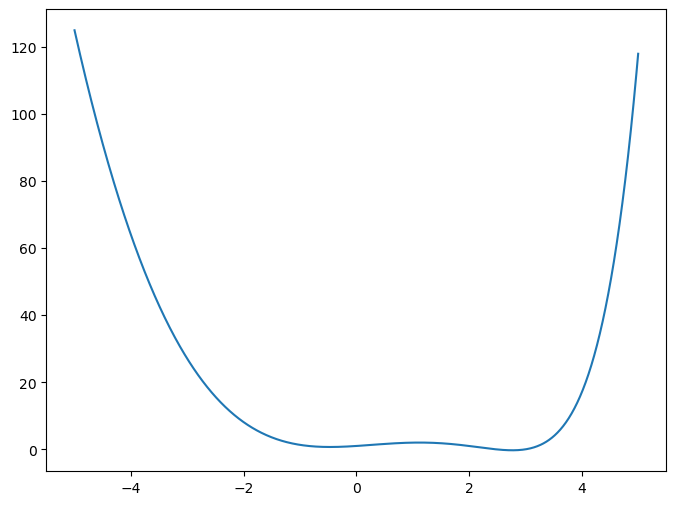

In [101]:
# Input en output voor f2(x) bepalen
x = np.linspace(-5,5,1000) 
y = f2(x)

# Input en output plotten: complete grafiek
plt.figure(figsize=(8,6), dpi=100)
plt.plot(x,y)
plt.show()

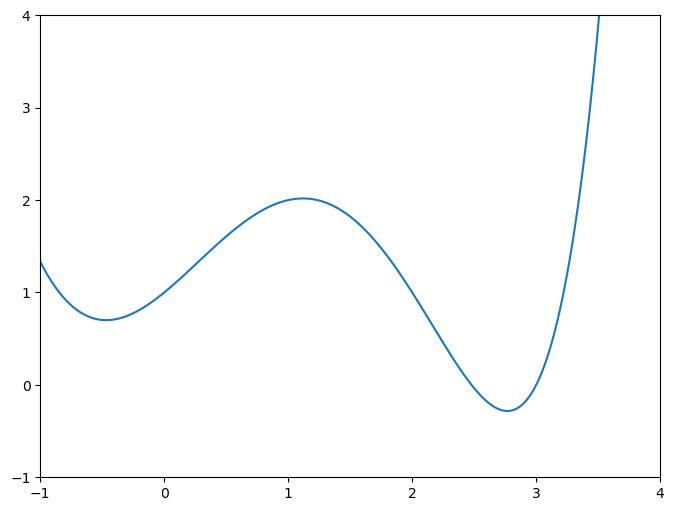

In [102]:
# Input en output plotten: inzoomen op minima
plt.figure(figsize=(8,6), dpi=100)
ax = plt.axes()
ax.set(xlim=(-1,4), ylim=(-1, 4))
plt.plot(x,y)
plt.show()

### Oefening 6.1b

Pas het gradient descent algoritme **handmatig** toe om *een* minimum van $f_2(x)$ te vinden voor een aantal scenario's:
1. Startpunt $x = 4$ en learning rate $\eta = 0.10$
2. Startpunt $x = 4$ en learning rate $\eta = 0.05$
2. Startpunt $x = 4$ en learning rate $\eta = 0.01$

Ga als volgt te werk:
- Bepaal de afgeleide $f'_2(x)$ van de functie $f_2(x)$
- Bepaal de gradient voor $x = 4$
- Bepaal met behulp van het startpunt, de gradient en de learning rate het vervolgpunt
- Ga door tot dat de gradient kleiner dan 0.1 is of tot dat je 5 iteraties hebt doorlopen
- Plot het startpunt en de gevonden vervolgpunten op de grafiek van $f_2(x)$ om te visualiseren wat er gebeurt

Schrijf code voor het gradient descent algoritme. Pas de code toe op de hierboven genoemde scenario's.

Ga als volgt te werk:
- Schrijf een functie `df2(x)` voor $f'_2(x)$ die als input een waarde van `x` krijgt en als output de gradient op dat punt `x` geeft
- Schrijf een functie `gd_f2(x, eta)` voor gradient descent voor $f_2(x)$ die als input een startpunt `x` en learning rate `eta` krijgt en als returnwaarde `(path_x, path_y)` de *paden* van zowel `x` als `y` geeft. De returnwaarde `path_x` ziet er bijvoorbeeld zo uit na 4 iteraties met startpunt `x = 4`: `path_x = [4, 3, 2, 1, 0]`. In `path_y` zitten dan de bijbehorende y-waarden met `y` = `f2(x)`.
- Maar stel eerst **pseudocode** op!
- Gebruik de returnwaarde `(path_x, path_y)` om het pad te visualiseren dat door gradient descent wordt afgelegd. Plot dit op de grafiek van $f_2(x)$.

## Deel III. Meerdere dimensies

De derde functie bevat niet één, maar twee variabelen:

\begin{equation*}
f_3(x_1, x_2) = {x_1^2} + {2 x_{2}^2}
\end{equation*}

Het is simpel in te zien dat het minimum bij $f_3(0, 0)$ ligt. Het is hieronder ook te zien:

In [103]:
def f3(x1, x2):
    return x1**2 + 2*x2**2

In [104]:
x1 = np.linspace(-5,5,10) 
x2 = np.linspace(-5,5,10)

In [105]:
y = np.zeros((len(x1),len(x2)))
for a in range(0,len(x1)):
    for b in range(0,len(x2)):
        y[a][b] = f3(x1[a], x2[b])

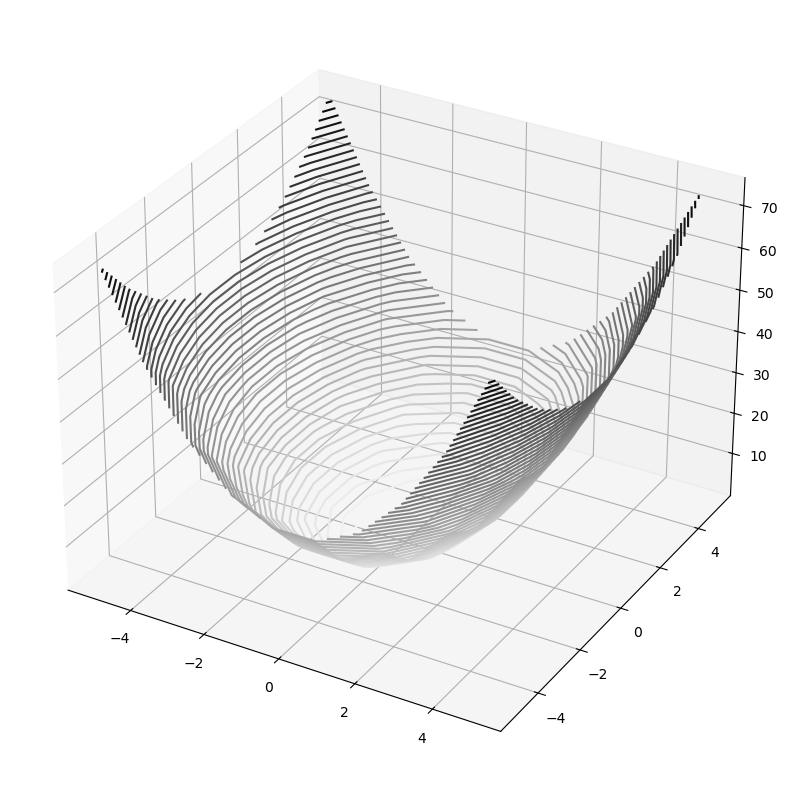

In [106]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(x1, x2, y, 50, cmap='binary')


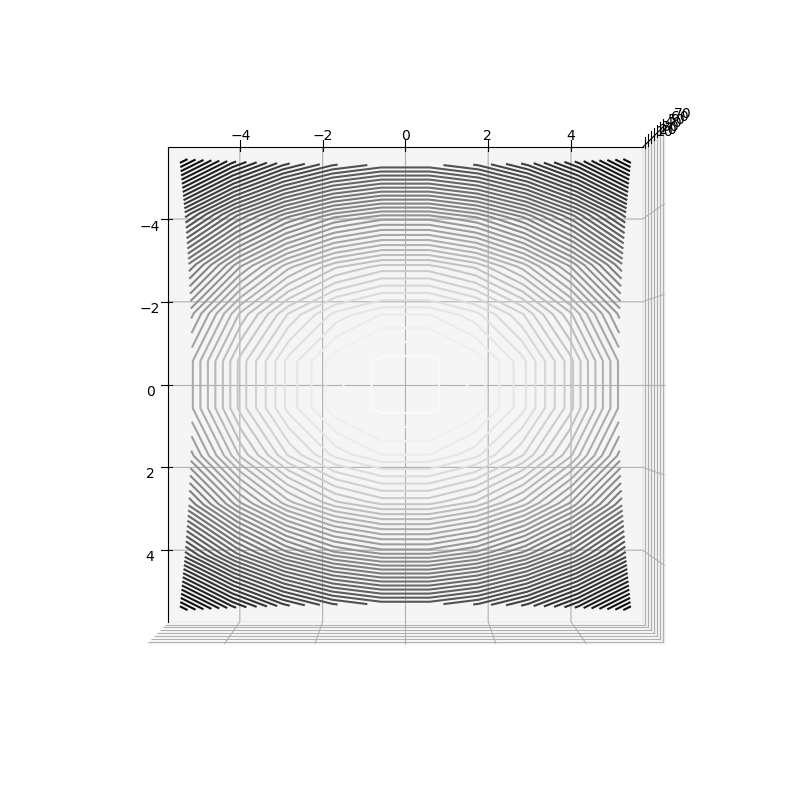

In [107]:
# Zelfde figuur, maar dan recht van boven
ax.view_init(90, 0)
fig

### Oefening 6.1c

Pas het gradient descent algoritme **handmatig** toe om *een* minimum van $f_3(x_1, x_2) = {x_1^2} + {2 x_{2}^2}$ te vinden voor onderstaande scenario's:
- Startpunt $(x_1, x_2) = (-4, 4)$, learning rate $\eta = 0.4$
- Startpunt $(x_1, x_2) = (-4, 4)$, learning rate $\eta = 0.04$

Ga als volgt te werk:
- Bepaal de partieel afgeleides van $f_3(x_1, x_2)$ voor $x_1$ en $x_2$, dus:

$$ \frac{\partial f_3}{\partial x_1} \text{ en } \frac{\partial f_3}{\partial x_2} $$ 

- Bepaal de gradients voor zowel $x_1$ als $x_2$ voor het gegeven startpunt
- Bepaal met behulp van het startpunt, de gradient en de learning rate het vervolgpunt
- Ga door tot dat de gradient kleiner dan 0.1 is of tot dat je 5 iteraties hebt doorlopen

NB. Let op het verschil tussen de stappen die gemaakt worden voor $x_1$ en $x_2$!

## Deel IV. De eindbaas

De *Bowser* van onze functies ziet er als volgt uit:

\begin{equation*}
f_{4}(x_1, x_2) = {3^{x_1}} - {x_1^3} + {3^{x_2}} - {x_2^3}
\end{equation*}

In [108]:
def f4(x1, x2):
    return 3**x1 - x1**3 + 3**x2 - x2**3

In [109]:
x1 = np.linspace(-3,4,1000) 
x2 = np.linspace(-3,4,1000)

y = np.zeros((len(x1),len(x2)))
for a in range(0,len(x1)):
    for b in range(0,len(x2)):
        y[a][b] = f4(x1[a], x2[b])

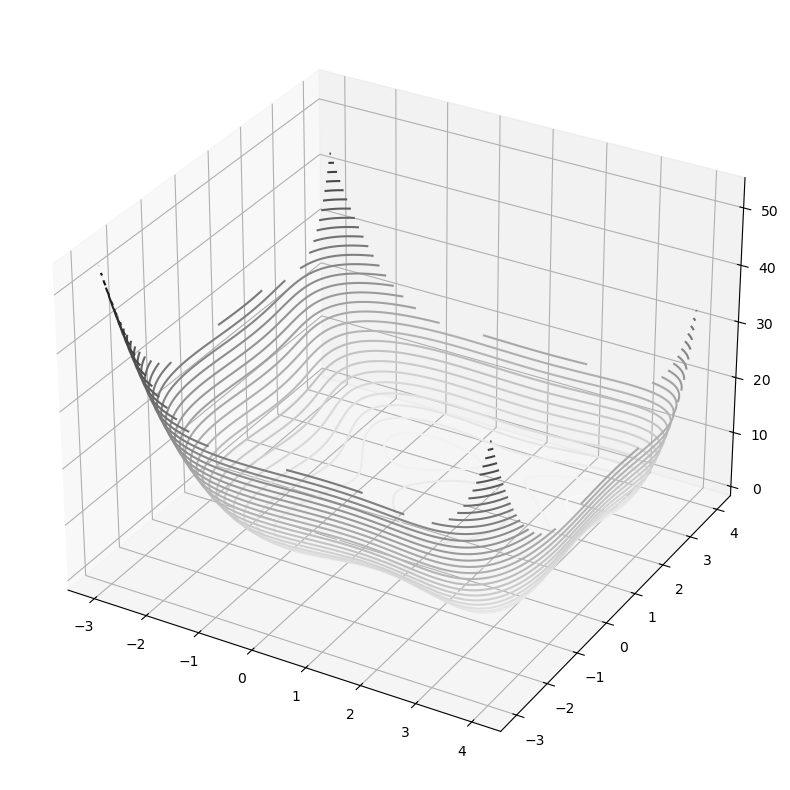

In [110]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.contour3D(x1, x2, y, 50, cmap='binary')

De beperkingen van de 3D plots van Matplotlib komen hier aan het licht, want het is helaas niet zo duidelijk dat de bodem niet vlak is, maar glooiend. Er is dus sprake van meerdere (lokale én globale) minima. Hieronder een interactieve plot, waarbij je dit beter ziet. 

In [111]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=y)])
fig.update_layout(title='Eindbaas', autosize=False, width=800, height=800, margin=dict(l=65, r=50, b=65, t=90))
fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# # Importeer holoviews en plotly eerst
# import holoviews as hv
# hv.extension('plotly')
# print("Holoviews version", hv.__version__)

# surface = hv.Surface(y, bounds=(-5, -5, 5, 5))
# surface.opts(width=500, height=500)

### Oefening 6.1d
  (optioneel)

Pas het gradient descent algoritme **handmatig** toe om *een* minimum van $f_{4}(x_1, x_2) = {3^{x_1}} - {x_1^3} + {3^{x_2}} - {x_2^3}$ te vinden voor de volgende scenario's:

- Startpunt $(x_1, x_2) = (2, 1)$, learning rate $\eta = 0.5$
- Startpunt $(x_1, x_2) = (2, 1)$, learning rate $\eta = 0.05$

Ga als volgt te werk:

- Bepaal de afgeleides van $f_4(x_1, x_2)$
- Bepaal de gradient op $(x_1, x_2) = (2, 1)$
- Bepaal met behulp van het startpunt, de gradient en de learning rate het vervolgpunt
- Ga door tot dat de gradient kleiner dan 0.1 is of tot dat je 5 iteraties hebt doorlopen

Breid de code voor het gradient descent algoritme uit om te kunnen werken met twee inputvariabelen. Pas de code toe op de hierboven genoemde scenario's.

Ga als volgt te werk:
- Schrijf voor beide afgeleides van $f_4(x_1, x_2)$ een functie die respectievelijk als input een waarde `x1` of `x2` krijgt en als output `y` geeft
- Schrijf een functie `gd_f4(x1, x2, eta)` voor gradient descent voor $f_4(x_1, x_2)$ die als input twee startpunten `x1` en `x2` en een learning rate `eta` krijgt en als returnwaarde `(path_x1, path_x2, path_y)` geeft. 
- Maar stel eerst **pseudocode** op! 